# Explore here

In [3]:
import pandas as pd

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Seleccionar las columnas relevantes
X = data[['Latitude', 'Longitude', 'MedInc']]

X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [6]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en train y test
train_data, test_data = train_test_split(X, test_size=0.2, random_state=42)

2: Construir un K-Means 

In [8]:
from sklearn.cluster import KMeans

# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_data)

KMeans(n_clusters=6, random_state=42)

In [9]:
# Añadir la columna 'cluster' al conjunto de datos de entrenamiento
train_data['cluster'] = kmeans.labels_
train_data.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


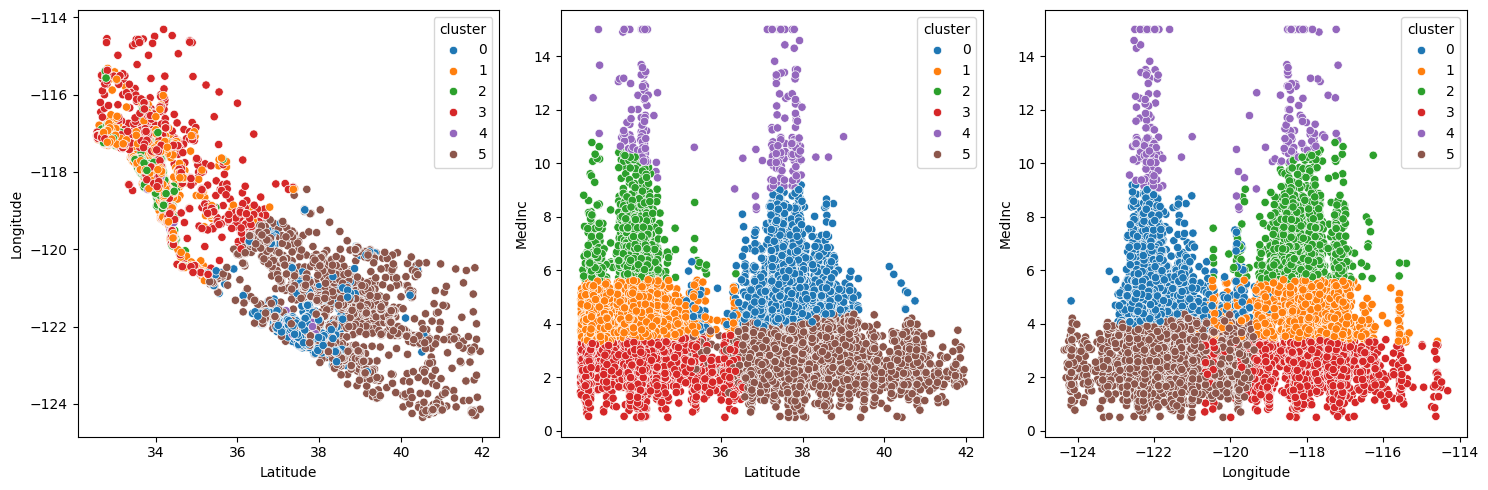

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Graficos destacando los diferentes clusters
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axis[0], data=train_data, x="Latitude", y="Longitude", hue="cluster", palette="tab10")
sns.scatterplot(ax=axis[1], data=train_data, x="Latitude", y="MedInc", hue="cluster", palette="tab10")
sns.scatterplot(ax=axis[2], data=train_data, x="Longitude", y="MedInc", hue="cluster", palette="tab10")

plt.tight_layout()
plt.show()
plt.show()

3: Predicción usando el conjunto test

In [12]:
# Predecir los clusters del conjunto de test
test_data['cluster'] = kmeans.predict(test_data)
test_data.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


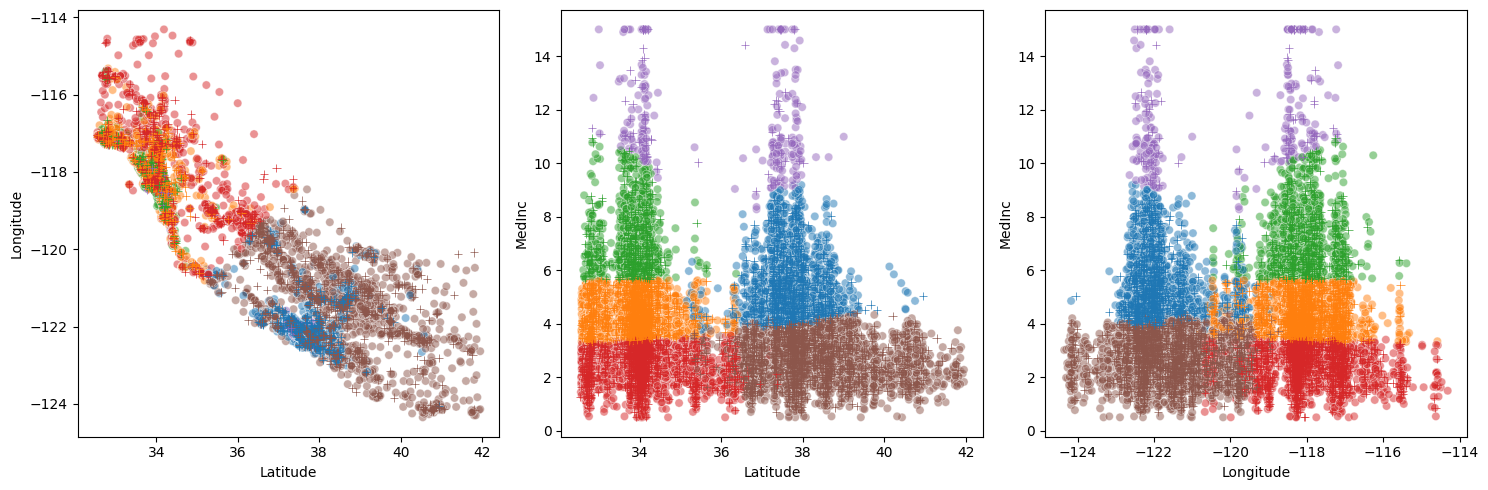

In [17]:
# Grafica de los resultados de test sobre los train

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axis[0], data=train_data, x="Latitude", y="Longitude", hue="cluster", palette="tab10", marker='o', alpha=0.5)
sns.scatterplot(ax=axis[1], data=train_data, x="Latitude", y="MedInc", hue="cluster", palette="tab10", marker='o', alpha=0.5)
sns.scatterplot(ax=axis[2], data=train_data, x="Longitude", y="MedInc", hue="cluster", palette="tab10", marker='o', alpha=0.5)

sns.scatterplot(ax=axis[0], data=test_data, x="Latitude", y="Longitude", hue="cluster", palette="tab10", marker="+")
sns.scatterplot(ax=axis[1], data=test_data, x="Latitude", y="MedInc", hue="cluster", palette="tab10", marker="+")
sns.scatterplot(ax=axis[2], data=test_data, x="Longitude", y="MedInc", hue="cluster", palette="tab10", marker="+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

4: Entrenamiento Modelo Unsupervised Learning

In [19]:
# Seleccionar características y etiquetas
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Entrenar un modelo de Unsupervised Learning
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones y obtener estadísticas
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [21]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

# Visualizar modelo
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=['Latitude', 'Longitude', 'MedInc'], class_names=[str(i) for i in range(6)], filled=True, rounded=True)
plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 2000x1000 with 0 Axes>